# Country Clustering

In [101]:
#UPDATED BY SS

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [102]:
data = pd.read_csv('Country-data.csv')
df = data.copy()

In [103]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


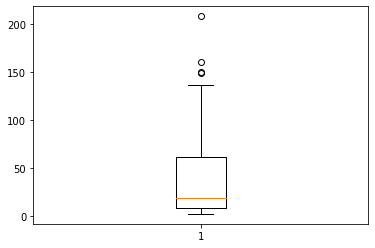

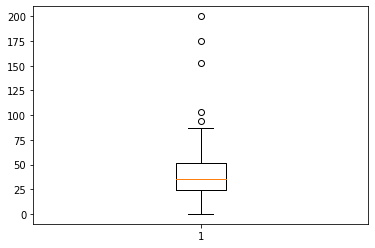

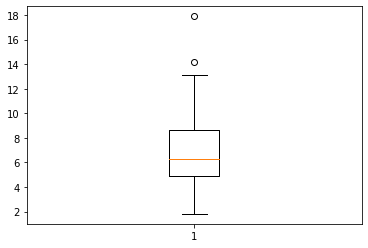

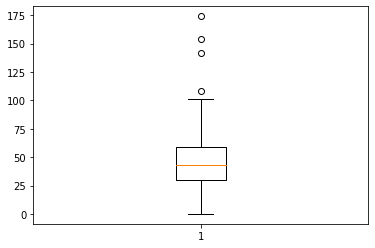

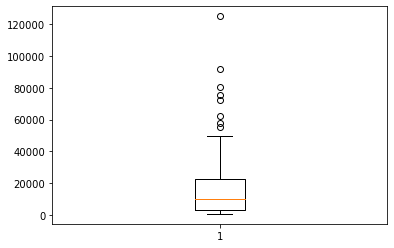

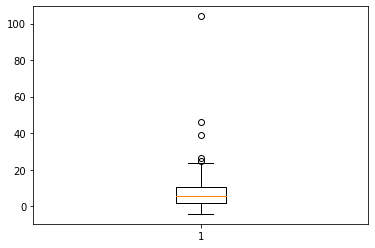

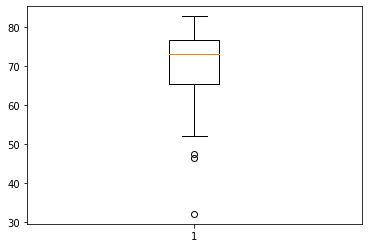

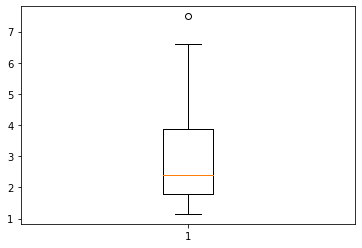

In [105]:
for col in df.columns[1:-1]:
    plt.boxplot(df[col])
    plt.show()

In [106]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [107]:
X = df.iloc[:,1:-1]

In [108]:
for col in X.columns:
    lowerbound, upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col], a_min = lowerbound, a_max = upperbound)

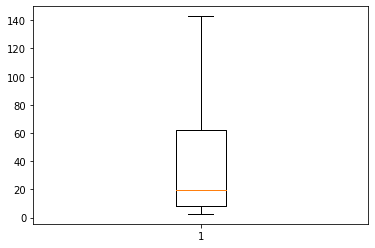

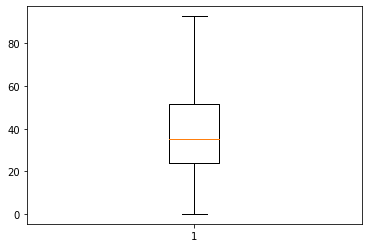

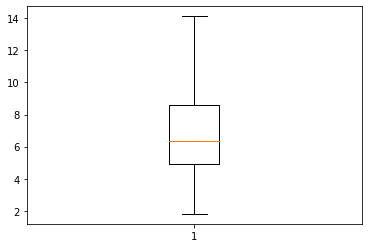

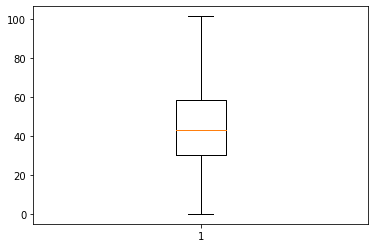

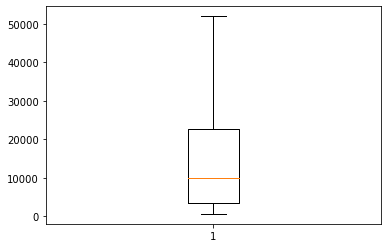

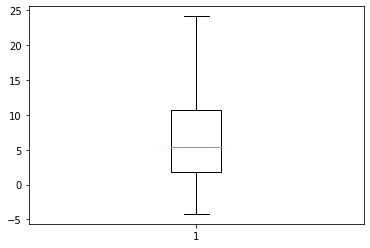

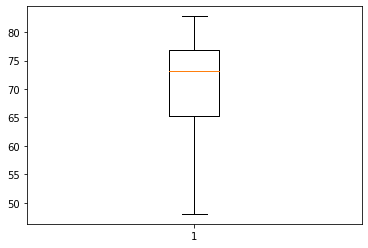

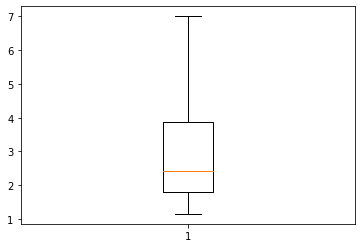

In [109]:
for col in df.columns[1:-1]:
    plt.boxplot(df[col])
    plt.show()

In [110]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67


In [111]:
X1 = X.iloc[:,[0,2,6,7]]

In [112]:
X1

,child_mort,health,life_expec,total_fer
0,90.2,7.58,56.2,5.82
1,16.6,6.55,76.3,1.65
2,27.3,4.17,76.5,2.89
3,119.0,2.85,60.1,6.16
4,10.3,6.03,76.8,2.13
...,...,...,...,...
162,29.2,5.25,63.0,3.50
163,17.1,4.91,75.4,2.47
164,23.3,6.84,73.1,1.95
165,56.3,5.18,67.5,4.67


In [113]:
X2 = X.iloc[:,[1,3,4,5]]

In [114]:
X2

,exports,imports,income,inflation
0,10.0,44.9,1610,9.44
1,28.0,48.6,9930,4.49
2,38.4,31.4,12900,16.10
3,62.3,42.9,5900,22.40
4,45.5,58.9,19100,1.44
...,...,...,...,...
162,46.6,52.7,2950,2.62
163,28.5,17.6,16500,45.90
164,72.0,80.2,4490,12.10
165,30.0,34.4,4480,23.60


In [115]:
X1 = X1.values
X2 = X2.values

In [116]:
mmc = MinMaxScaler()
X1 = mmc.fit_transform(X1)
X2 = mmc.fit_transform(X2)

In [117]:
pca = PCA(n_components = 1)
X1 = pca.fit_transform(X1)
X2 = pca.fit_transform(X2)
explained_variance = pca.explained_variance_ratio_

In [118]:
X3 = np.concatenate((X1, X2), axis=1)

In [119]:
X3

array([[ 5.70686230e-01, -1.75585557e-01],
       [-2.46844073e-01, -6.44677857e-02],
       [-6.76357206e-02, -8.40244727e-02],
       [ 6.90145606e-01, -1.07495895e-02],
       [-2.13201091e-01,  6.65092517e-02],
       [-1.85469182e-01, -1.73424500e-01],
       [-1.91701647e-01, -1.15539233e-01],
       [-3.21370503e-01, -3.29860160e-02],
       [-3.80649869e-01,  1.57583672e-01],
       [-8.43637563e-02, -4.92309618e-02],
       [-2.20848032e-01,  5.64235504e-03],
       [-1.97835666e-01,  2.08285567e-01],
       [-4.63836158e-03, -2.19987842e-01],
       [-2.55858115e-01,  1.09723662e-03],
       [-2.30704395e-01,  7.34924623e-02],
       [-3.28417037e-01,  3.09060997e-01],
       [-7.14094393e-02,  5.41977275e-02],
       [ 5.57097588e-01, -1.43664403e-01],
       [-4.81148434e-02,  3.17723684e-02],
       [ 5.69448778e-02, -9.03749361e-02],
       [-3.53881844e-01, -4.81033984e-02],
       [ 1.43157229e-01,  3.16317510e-03],
       [-2.24563788e-01, -2.15985267e-01],
       [-2.

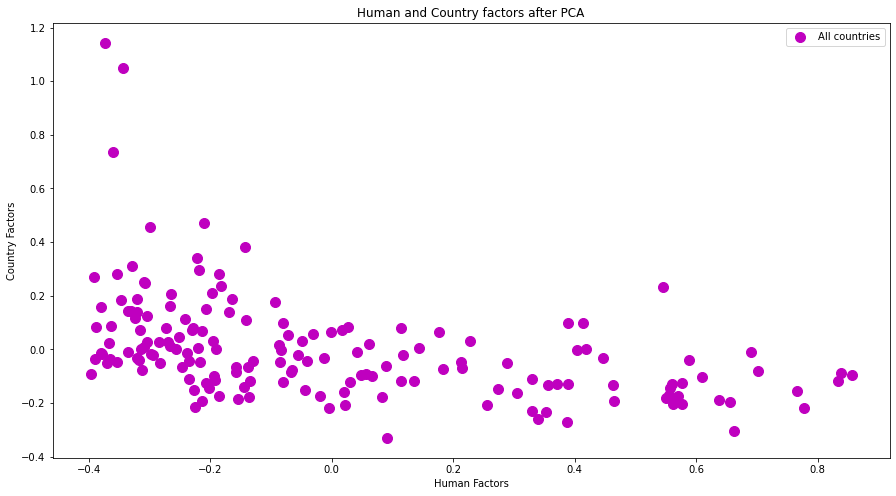

In [120]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X1,X2,s=100,c='m',label='All countries')
plt.title('Human and Country factors after PCA')
plt.xlabel('Human Factors')
plt.ylabel('Country Factors')
plt.legend()
plt.show()

Elbow Method

C:\Users\Tural\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


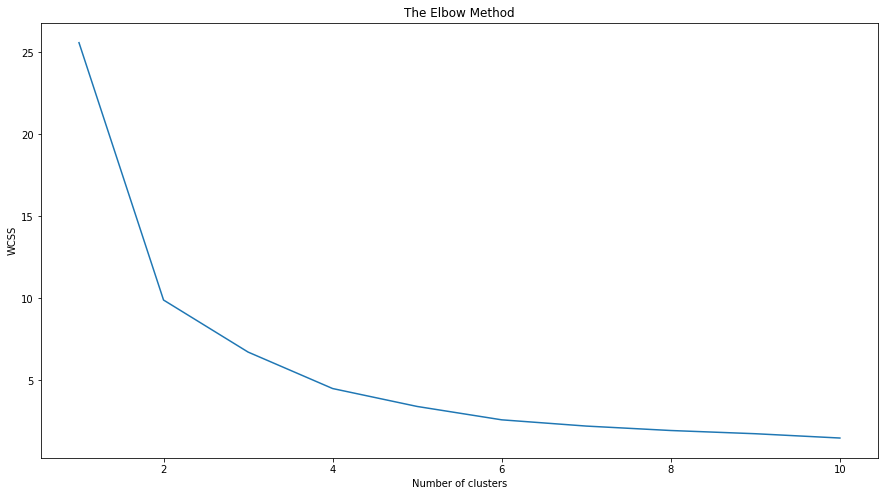

In [129]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize = (15,8))  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [122]:
range_n_clusters = [2, 3, 4]
for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7029238069045901
For n_clusters = 3 The average silhouette_score is : 0.682562796603809
For n_clusters = 4 The average silhouette_score is : 0.6256015812769476


# K means

In [123]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)

In [124]:
y_kmeans

array([1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1])

In [125]:
kmeans.cluster_centers_

array([[-0.28511189,  0.13959538],
       [ 0.51737541, -0.12490239],
       [-0.03146178, -0.07537048]])

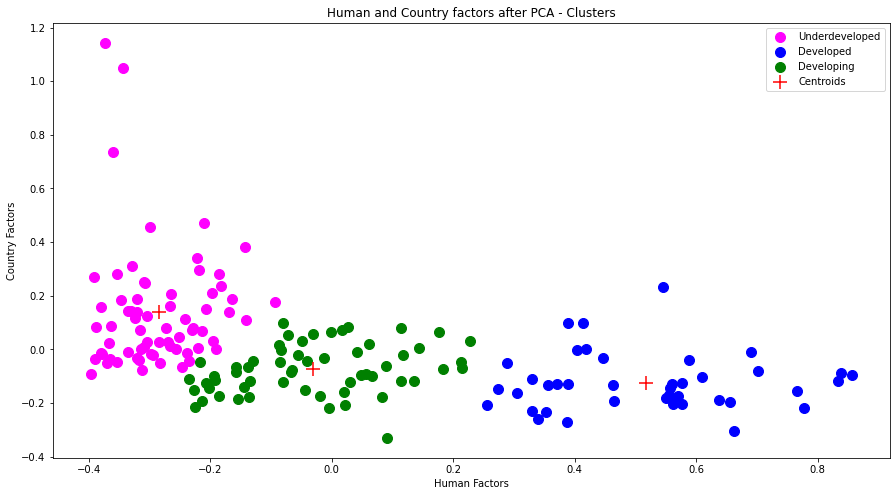

In [127]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X3[y_kmeans==0,0],X3[y_kmeans==0,1],s=100,c='magenta',label='Underdeveloped')
plt.scatter(X3[y_kmeans==1,0],X3[y_kmeans==1,1],s=100,c='blue',label='Developed')
plt.scatter(X3[y_kmeans==2,0],X3[y_kmeans==2,1],s=100,c='green',label='Developing')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Human and Country factors after PCA - Clusters')
plt.xlabel('Human Factors')
plt.ylabel('Country Factors')
plt.legend()
plt.show()

# Hierarchial

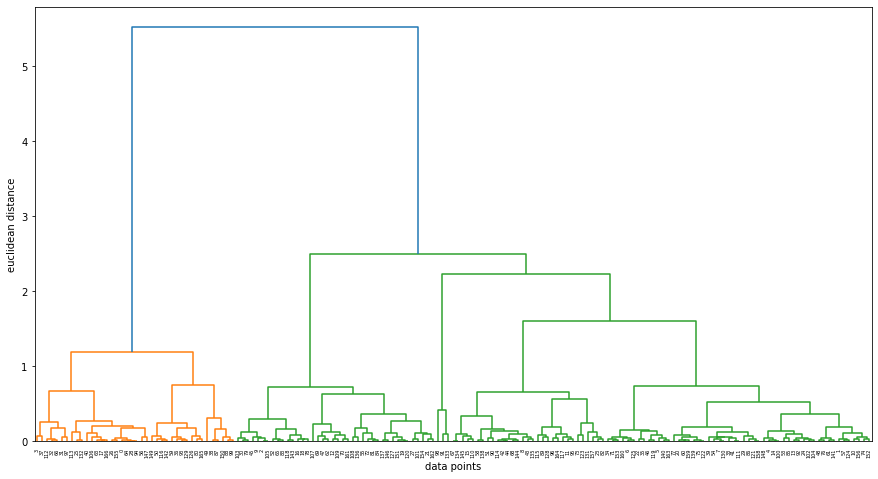

In [128]:
# %% dendogram
fig = plt.figure(figsize = (15,8))
merg = linkage(X3,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

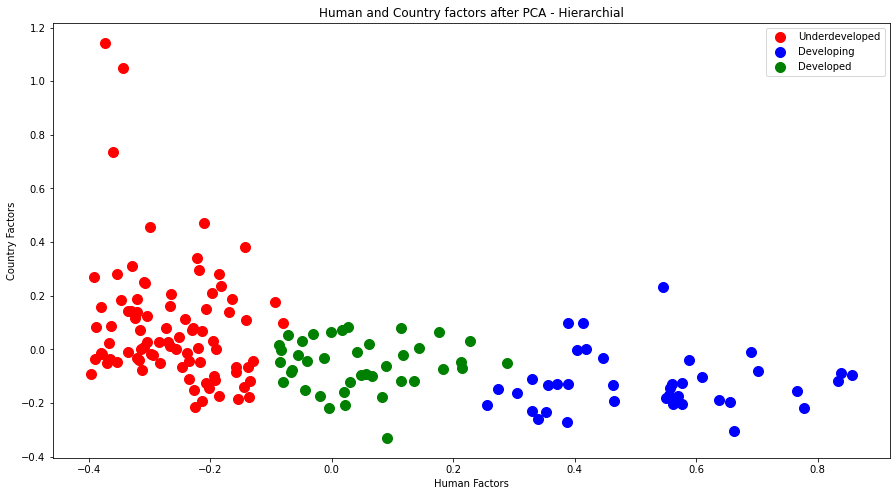

In [135]:
#HC
fig = plt.figure(figsize = (15,8))
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X3)

plt.scatter(X3[hc_predict==0,0],X3[hc_predict==0,1],s=100, c='red', label='Underdeveloped')
plt.scatter(X3[hc_predict==1,0],X3[hc_predict==1,1],s=100, c='blue', label = 'Developing')
plt.scatter(X3[hc_predict==2,0],X3[hc_predict==2,1],s=100, c='green', label = 'Developed')
plt.title('Human and Country factors after PCA - Hierarchial')
plt.xlabel('Human Factors')
plt.ylabel('Country Factors')
plt.legend()